**Let us demonstrate the binomial distribution using an example**

Let us perform an experiment where we administer a drug to a patient. The treatment of a single patient
with the drug results in only one of two outcomes - Either the patient is cured or not cured, where
the two outcomes are mutually exclusive. In addition, only one of these outcomes is possible
after treatment. A patient cannot be both cured and not cured after treatment. This experiment is called a binomial trial. A binomial trial is a single binomial experiment or observation. Each binomial
trial must be independent. The result of a patient’s treatment does not influence the outcome of
the treatment for a different patient.

Let's say we perform the experiment on three patients, A, B, C. So the number of binomial trials in this case is 3(N=3). the four possible results (Generally, For N trials there are N+1 results) are
1. three cures;
2. two cures and one failure;
3. two failures and one cure;
4. three failures.

And let's say the probability of success (the patient is cured), p=0.75. 

Now, we want to know the probability of each outcome.

**Mathematical Significance**

The probability of the outcome of a binomial experiment consisting of N trials can be
computed from the expansion of the expression
$(p + q)^N$

So, in our case, it's $(p+q)^3$ which is
* $(p + q)^3 = p^3 + 3p^2q + 3pq^2 + q^3$

each coefficient gives the probability of a particular outcome. For example:

* $p^3$ --> Three Cures
* $3p^2q$ --> two cures and one failure
* $3pq^2$ --> two failures and one cure
* $q^3$ --> Three Failures

We can also observe that p+q=1, which implies the sum of probability of all possible outcomes is 1

The expansion of the binomial, $(p + q)^N$ can be generalized by a single formula:

Probability of Xsuccesses in Ntrials = $(N X)p^xq^(N-x)$

$(N X)$ is defined as
$N!/(X!(N − X)!)$

In [2]:
# Let's define a function to calculate the probability of X successes in N trials

import math

def combination(N, x):
    '''To calculate NCx'''
    return math.factorial(N)/(math.factorial(x)*math.factorial(N-x))

def Binomial(N, x, p):
    return combination(N, x)*math.pow(p, x)*math.pow(1-p, N-x)

In [3]:
# Now let's use this function to calculate probabilities
print(Binomial(3, 3, 0.75)) #three cures
print(Binomial(3, 2, 0.75)) #two cures and one failure
print(Binomial(3, 1, 0.75)) #one cures and two failure
print(Binomial(3, 0, 0.75)) #three failures

0.421875
0.421875
0.140625
0.015625


Now let's implement the same in python and compare the results. In pyhton, let's simulate the experiment 10000 times to get an accurate result

In [4]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
'''this says define an array of size 10000 where the data follows a binomial distribution
with n=3 and p=0.75.

This can also be interpreted as, Run the experiment 10000 times and give me the outcome of each experiment.
Like for one experiemnt the outcome will be 3 success. for other it will be 2 success, 1 failure and so on...'''

x = np.random.binomial(n=3, p=0.75, size=10000)

In [6]:
# let's put it in a dataframe
df = pd.DataFrame(data=x, columns=["cured"])
df["not cured"] = 3-df["cured"]
df.head()

,cured,not cured
0,1,2
1,3,0
2,2,1
3,2,1
4,2,1


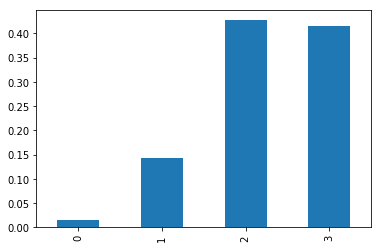

In [7]:
# now let's see the probability distribution
pd = df.cured.value_counts().sort_index()/10000
pd.plot(kind="bar")

Hence, we can see, both give almost the same results